<a href="https://colab.research.google.com/github/sergioGarcia91/TRE_NN_MesaLosSantos/blob/main/03_Porosity_Surface__Map_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Change letter

In [ ]:
!wget https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf

--2025-01-06 12:44:20--  https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf [following]
--2025-01-06 12:44:20--  https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 834452 (815K) [application/octet-stream]
Saving to: ‘Times New Roman.ttf’

Times New Roman.ttf 100%[===================>] 814.89K  --.-KB/s    in 0.06s   

2025-01-06 12:44:20 (14.2 MB/s) - ‘Times New Roman.ttf’ saved [834452/834452]



In [ ]:
import matplotlib.font_manager as fm

In [ ]:
font_path = 'Times New Roman.ttf'
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)

font_name = font_prop.get_name()
font_name

'Times New Roman'

In [ ]:
plt.rcParams['font.family'] = font_name

# Load data

In [ ]:
path_save_plots = '/content/drive/MyDrive/Manuscritos_Investigacion/ModelosGeofisica_NN_MesaLosSantos_Congreso2023/Figures/'
path_save_models_thesis = '/content/drive/MyDrive/Manuscritos_Investigacion/ModelosGeofisica_NN_MesaLosSantos_Congreso2023/PorosityModels_thesis/'
path_shapefiles = '/content/drive/MyDrive/Manuscritos_Investigacion/ModelosGeofisica_NN_MesaLosSantos_Congreso2023/Shapes/'

<Axes: >

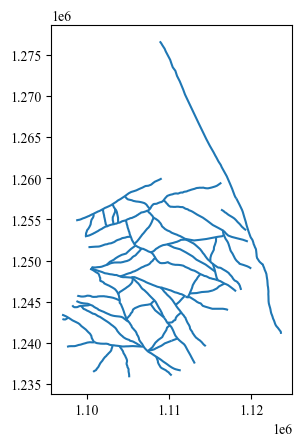

In [ ]:
faults = 'Fallas_Mesa_corregido2.shp'
faults = gp.read_file(path_shapefiles + faults)
faults.plot()

<Axes: >

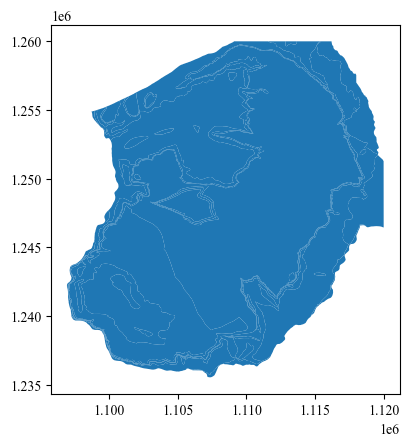

In [ ]:
geo = 'geologia_mesa_2.shp'
geo = gp.read_file(path_shapefiles + geo)
geo.plot()

## CSV map

In [ ]:
dfMapaSup = pd.read_csv(path_save_models_thesis + 'geo_mapa_sup2.csv')
dfMapaSup.columns = ['coorX', 'coorY', 'coorZ', 'distFault', 'Unidad']
dfMapaSup.head()

,coorX,coorY,coorZ,distFault,Unidad
0,1109036.77,1259898.34,1284.0,48.773613,K1ls_mi
1,1109136.77,1259898.34,1309.0,99.600276,K1ls_mi
2,1109236.77,1259898.34,1317.0,161.484813,K1ls_mi
3,1109336.77,1259898.34,1330.0,247.283448,K1ls_mi
4,1109436.77,1259898.34,1350.0,340.903116,K1ls_mi


In [ ]:
dfMapaSup['Unidad'].unique()

array(['K1ls_mi', 'J1-2j', 'OSs', 'J1gp', 'K1ls_mm', 'K1ls_ms', 'K1r',
       'K1p', 'K1t'], dtype=object)

## Data normalization

In [ ]:
dfMapaSup['codigoUnidad'] = dfMapaSup['Unidad'].replace({'OSs':0, #silgara
                                                         'J1gp':1, #granito
                                                         'J1-2j':2, #jordan
                                                         'K1ls_mi':3, #santos inf
                                                         'K1ls_mm':4, #santos med
                                                         'K1ls_ms':5, #santo sup
                                                         'K1r':6, #rosablanca
                                                         'K1p':7, #paja
                                                         'K1t':8}) #tablazo

<ipython-input-12-64f375b3c396>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfMapaSup['codigoUnidad'] = dfMapaSup['Unidad'].replace({'OSs':0, #silgara


In [ ]:
dfMapaSup['X_norm'] = (dfMapaSup['coorX'] - 1096700) / (1120100 - 1096700)
dfMapaSup['Y_norm'] = (dfMapaSup['coorY'] - 1235500) / (1260100 - 1235500)
dfMapaSup['Z_norm'] = (dfMapaSup['coorZ'] - (-150)) / (1830 - (-150))
dfMapaSup['Df_norm'] = (dfMapaSup['distFault'] - (000)) / (3000 - (000))
dfMapaSup.head()

,coorX,coorY,coorZ,distFault,Unidad,codigoUnidad,X_norm,Y_norm,Z_norm,Df_norm
0,1109036.77,1259898.34,1284.0,48.773613,K1ls_mi,3,0.527212,0.991802,0.724242,0.016258
1,1109136.77,1259898.34,1309.0,99.600276,K1ls_mi,3,0.531486,0.991802,0.736869,0.033200
2,1109236.77,1259898.34,1317.0,161.484813,K1ls_mi,3,0.535759,0.991802,0.740909,0.053828
3,1109336.77,1259898.34,1330.0,247.283448,K1ls_mi,3,0.540033,0.991802,0.747475,0.082428
4,1109436.77,1259898.34,1350.0,340.903116,K1ls_mi,3,0.544306,0.991802,0.757576,0.113634


In [ ]:
mapaSupEntrada = dfMapaSup[['X_norm', 'Y_norm',	'Z_norm',	'Df_norm', 'codigoUnidad']]
mapaSupEntrada

,X_norm,Y_norm,Z_norm,Df_norm,codigoUnidad
0,0.527212,0.991802,0.724242,0.016258,3
1,0.531486,0.991802,0.736869,0.033200,3
2,0.535759,0.991802,0.740909,0.053828,3
3,0.540033,0.991802,0.747475,0.082428,3
4,0.544306,0.991802,0.757576,0.113634,3
...,...,...,...,...,...
40820,0.467383,0.008063,0.298499,0.628693,2
40821,0.450289,0.003998,0.298485,0.696013,2
40822,0.454563,0.003998,0.298990,0.724802,2
40823,0.458836,0.003998,0.297544,0.699951,2


# Models list

In [ ]:
models_list = os.listdir(path_save_models_thesis)
models_list = [model for model in models_list if model.endswith('.pkl')]
print(len(models_list))
models_list

16


['porosidadNNrelu_hl15_9_5Sc42.pkl',
 'porosidadNNrelu_hl5_5_5Sc45.pkl',
 'porosidadNNrelu_hl90_45_5Sc33.pkl',
 'porosidadNNrelu_hl25_8_5Sc32.pkl',
 'porosidadNNtanh_hl5_5_5Sc40.pkl',
 'porosidadNNtanh_hl5_5_5Sc60.pkl',
 'porosidadNNtanh_hl5_5_5Sc61.pkl',
 'porosidadNNtanh_hl5_5_5Sc71.pkl',
 'porosidadNNtanh_hl20_8_5Sc73.pkl',
 'porosidadNNtanh_hl30_10_5Sc78.pkl',
 'porosidadNNtanh_hl35_11_5Sc80.pkl',
 'porosidadNNlogistic_hl15_7_5Sc52.pkl',
 'porosidadNNlogistic_hl15_7_5Sc59.pkl',
 'porosidadNNlogistic_hl35_11_5Sc60.pkl',
 'porosidadNNlogistic_hl50_14_5Sc65.pkl',
 'porosidadNNlogistic_hl75_19_5Sc73.pkl']

## Thesis model

In [ ]:
!wget https://github.com/sergioGarcia91/AplicativoMesaLosSantos/raw/refs/heads/main/modelosNN/porosidadNNrelu_hl25_8_5Sc32.pkl

--2025-01-06 12:44:27--  https://github.com/sergioGarcia91/AplicativoMesaLosSantos/raw/refs/heads/main/modelosNN/porosidadNNrelu_hl25_8_5Sc32.pkl
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sergioGarcia91/AplicativoMesaLosSantos/refs/heads/main/modelosNN/porosidadNNrelu_hl25_8_5Sc32.pkl [following]
--2025-01-06 12:44:27--  https://raw.githubusercontent.com/sergioGarcia91/AplicativoMesaLosSantos/refs/heads/main/modelosNN/porosidadNNrelu_hl25_8_5Sc32.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7545 (7.4K) [application/octet-stream]
Saving to: ‘porosidadNNrelu_hl25_8_5Sc32.pkl’

porosid

In [ ]:
model_thesis = 'porosidadNNrelu_hl25_8_5Sc32.pkl'
model_thesis = joblib.load(model_thesis)

model_thesis

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MLPRegressor from version 0.22.2.post1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


MLPRegressor(alpha=1e-05, early_stopping=True, hidden_layer_sizes=(25, 8, 5),
             max_iter=6000, solver='lbfgs', verbose=True)

# Predict

# Thesis model

In [ ]:
dfMapaSup['Porosity thesis'] = model_thesis.predict(mapaSupEntrada)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [ ]:
dfMapaSup.head()

,coorX,coorY,coorZ,distFault,Unidad,codigoUnidad,X_norm,Y_norm,Z_norm,Df_norm,Porosity thesis
0,1109036.77,1259898.34,1284.0,48.773613,K1ls_mi,3,0.527212,0.991802,0.724242,0.016258,4.801592
1,1109136.77,1259898.34,1309.0,99.600276,K1ls_mi,3,0.531486,0.991802,0.736869,0.033200,5.168388
2,1109236.77,1259898.34,1317.0,161.484813,K1ls_mi,3,0.535759,0.991802,0.740909,0.053828,5.378989
3,1109336.77,1259898.34,1330.0,247.283448,K1ls_mi,3,0.540033,0.991802,0.747475,0.082428,5.702990
4,1109436.77,1259898.34,1350.0,340.903116,K1ls_mi,3,0.544306,0.991802,0.757576,0.113634,6.122034


## 16 models

In [ ]:
models_list

['porosidadNNrelu_hl15_9_5Sc42.pkl',
 'porosidadNNrelu_hl5_5_5Sc45.pkl',
 'porosidadNNrelu_hl90_45_5Sc33.pkl',
 'porosidadNNrelu_hl25_8_5Sc32.pkl',
 'porosidadNNtanh_hl5_5_5Sc40.pkl',
 'porosidadNNtanh_hl5_5_5Sc60.pkl',
 'porosidadNNtanh_hl5_5_5Sc61.pkl',
 'porosidadNNtanh_hl5_5_5Sc71.pkl',
 'porosidadNNtanh_hl20_8_5Sc73.pkl',
 'porosidadNNtanh_hl30_10_5Sc78.pkl',
 'porosidadNNtanh_hl35_11_5Sc80.pkl',
 'porosidadNNlogistic_hl15_7_5Sc52.pkl',
 'porosidadNNlogistic_hl15_7_5Sc59.pkl',
 'porosidadNNlogistic_hl35_11_5Sc60.pkl',
 'porosidadNNlogistic_hl50_14_5Sc65.pkl',
 'porosidadNNlogistic_hl75_19_5Sc73.pkl']

In [ ]:
df_16models = pd.DataFrame()

for model in models_list:
  nn_model = model
  model = joblib.load(path_save_models_thesis + model)
  df_16models[nn_model] = model.predict(mapaSupEntrada)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MLPRegressor from version 0.22.2.post1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MLPRegressor from version 0.22.2.post1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dis

In [ ]:
df_16models.head()

,porosidadNNrelu_hl15_9_5Sc42.pkl,porosidadNNrelu_hl5_5_5Sc45.pkl,porosidadNNrelu_hl90_45_5Sc33.pkl,porosidadNNrelu_hl25_8_5Sc32.pkl,porosidadNNtanh_hl5_5_5Sc40.pkl,porosidadNNtanh_hl5_5_5Sc60.pkl,porosidadNNtanh_hl5_5_5Sc61.pkl,porosidadNNtanh_hl5_5_5Sc71.pkl,porosidadNNtanh_hl20_8_5Sc73.pkl,porosidadNNtanh_hl30_10_5Sc78.pkl,porosidadNNtanh_hl35_11_5Sc80.pkl,porosidadNNlogistic_hl15_7_5Sc52.pkl,porosidadNNlogistic_hl15_7_5Sc59.pkl,porosidadNNlogistic_hl35_11_5Sc60.pkl,porosidadNNlogistic_hl50_14_5Sc65.pkl,porosidadNNlogistic_hl75_19_5Sc73.pkl
0,5.556373,5.070777,4.730391,4.801592,2.389728,1.210509,4.261136,4.362068,1.172521,2.411704,1.980274,2.403174,2.792984,2.988739,4.948204,5.399458
1,5.653598,5.299249,5.041258,5.168388,2.389728,1.200330,4.247147,4.445637,5.807793,1.997271,1.954198,3.127880,2.792984,2.988739,18.210088,5.397134
2,5.690051,5.432915,5.259541,5.378989,2.389728,1.185247,4.236626,4.479179,19.530565,0.877519,1.852109,3.279236,2.792984,2.988739,5.471655,5.394714
3,5.742786,5.646810,5.575460,5.702990,2.389728,1.160931,4.224974,4.521390,20.628571,-0.178392,1.773829,3.283180,2.792984,2.988739,4.596802,5.394161
4,5.819819,5.923585,5.961572,6.122034,2.389728,1.134213,4.214085,4.572842,16.141660,-4.092032,1.745230,4.826607,2.792984,2.988739,4.144545,5.402361


## Mean and Standard deviation

In [ ]:
dfMapaSup['Mean 16models'] = df_16models.mean(axis=1)
dfMapaSup['Std 16models'] = df_16models.std(axis=1)

dfMapaSup.head()

,coorX,coorY,coorZ,distFault,Unidad,codigoUnidad,X_norm,Y_norm,Z_norm,Df_norm,Porosity thesis,Mean 16models,Std 16models
0,1109036.77,1259898.34,1284.0,48.773613,K1ls_mi,3,0.527212,0.991802,0.724242,0.016258,4.801592,3.529977,1.511450
1,1109136.77,1259898.34,1309.0,99.600276,K1ls_mi,3,0.531486,0.991802,0.736869,0.033200,5.168388,4.732589,3.894942
2,1109236.77,1259898.34,1317.0,161.484813,K1ls_mi,3,0.535759,0.991802,0.740909,0.053828,5.378989,4.764987,4.262296
3,1109336.77,1259898.34,1330.0,247.283448,K1ls_mi,3,0.540033,0.991802,0.747475,0.082428,5.702990,4.765309,4.596764
4,1109436.77,1259898.34,1350.0,340.903116,K1ls_mi,3,0.544306,0.991802,0.757576,0.113634,6.122034,4.380498,4.060880


# Plot

In [ ]:
dfMapaSup.columns

Index(['coorX', 'coorY', 'coorZ', 'distFault', 'Unidad', 'codigoUnidad',
       'X_norm', 'Y_norm', 'Z_norm', 'Df_norm', 'Porosity thesis',
       'Mean 16models', 'Std 16models'],
      dtype='object')

In [ ]:
dfMapaSup.describe().round(2)

,coorX,coorY,coorZ,distFault,codigoUnidad,X_norm,Y_norm,Z_norm,Df_norm,Porosity thesis,Mean 16models,Std 16models
count,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00
mean,1108740.99,1248026.61,1263.17,522.61,3.85,0.51,0.51,0.71,0.17,4.62,4.84,3.50
std,5523.04,6250.78,363.08,401.28,2.03,0.24,0.25,0.18,0.13,3.14,3.33,3.04
min,1097036.77,1235598.34,301.12,0.05,0.00,0.01,0.00,0.23,0.00,-0.50,-4.54,0.32
25%,1104236.77,1242798.34,1040.00,200.96,2.00,0.32,0.30,0.60,0.07,1.94,2.36,1.38
50%,1108736.77,1248098.34,1289.00,438.81,5.00,0.51,0.51,0.73,0.15,3.68,4.30,2.80
75%,1113236.77,1253298.34,1624.00,759.42,5.00,0.71,0.72,0.90,0.25,6.84,6.77,4.62
max,1119936.77,1259898.34,1819.00,2605.49,8.00,0.99,0.99,0.99,0.87,22.01,18.25,26.27


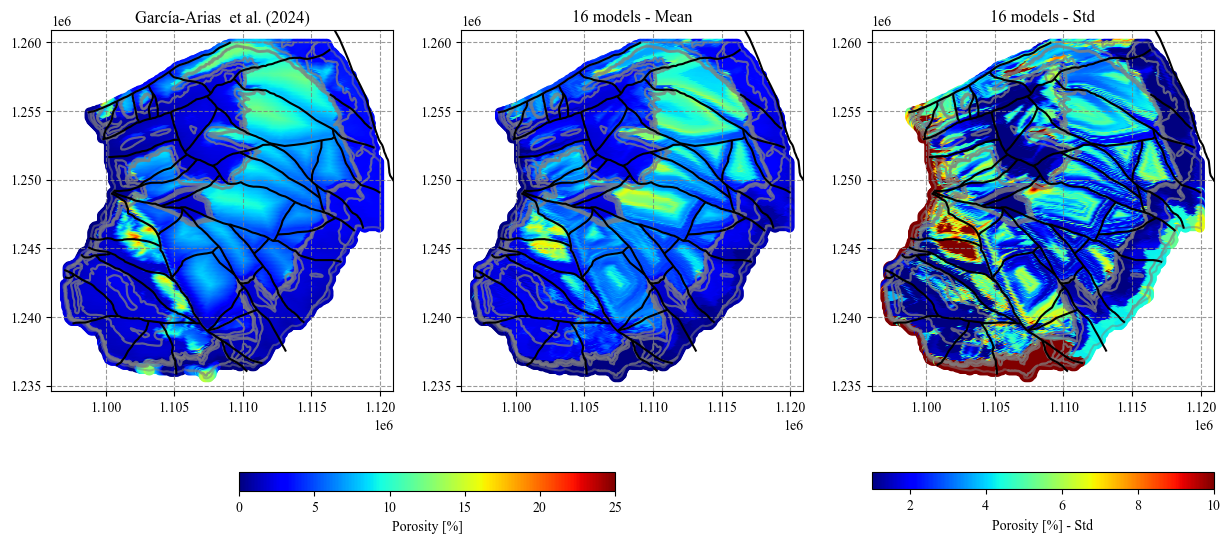

In [ ]:
x_min = dfMapaSup['coorX'].min() - 1000
x_max = dfMapaSup['coorX'].max() + 1000

y_min = dfMapaSup['coorY'].min() - 1000
y_max = dfMapaSup['coorY'].max() + 1000

fig, ax = plt.subplots(1,3, figsize=(15, 7))

mp = ax[0].scatter(dfMapaSup['coorX'], dfMapaSup['coorY'],
              c=dfMapaSup['Porosity thesis'], cmap='jet',
              vmin=0, vmax=25)
geo.boundary.plot(ax=ax[0], color="gray", alpha=0.5)
faults.plot(ax=ax[0], color="black")
ax[0].set_xlim(x_min, x_max)
ax[0].set_ylim(y_min, y_max)
ax[0].set_title('García-Arias  et al. (2024)')
ax[0].grid(ls='--', color='grey', alpha=0.8)

ax[1].scatter(dfMapaSup['coorX'], dfMapaSup['coorY'],
              c=dfMapaSup['Mean 16models'], cmap='jet',
              vmin=0, vmax=25)
geo.boundary.plot(ax=ax[1], color="gray", alpha=0.5)
faults.plot(ax=ax[1], color="black")
ax[1].set_xlim(x_min, x_max)
ax[1].set_ylim(y_min, y_max)
ax[1].set_title('16 models - Mean')
ax[1].grid(ls='--', color='grey', alpha=0.8)

mp2 = ax[2].scatter(dfMapaSup['coorX'], dfMapaSup['coorY'],
                    c=dfMapaSup['Std 16models'], cmap='jet',
                    vmin=1, vmax=10)
geo.boundary.plot(ax=ax[2], color="gray", alpha=0.5)
faults.plot(ax=ax[2], color="black")
ax[2].set_xlim(x_min, x_max)
ax[2].set_ylim(y_min, y_max)
ax[2].set_title('16 models - Std')
ax[2].grid(ls='--', color='grey', alpha=0.8)

plt.colorbar(mp, ax=ax[0:2], shrink=0.5, label='Porosity [%]', orientation='horizontal')
plt.colorbar(mp2, ax=ax[2], shrink=1, label='Porosity [%] - Std', orientation='horizontal')

plt.savefig(path_save_plots + f'Maps.png',
            dpi=500,
            bbox_inches = 'tight',
            pad_inches=0.25)

plt.show()

# End